# Data Visualization for Master Thesis

Introduction

## Import Resources

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Visualization

### Vis 1

In [77]:
path_1_1 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_ILPD_1_1.csv"
path_1_2 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_ILPD_1_2.csv"
path_1_3 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_ILPD_1_3.csv"

df_1_1 = pd.read_csv(path_1_1, index_col=False)
df_1_2 = pd.read_csv(path_1_2, index_col=False)
df_1_3 = pd.read_csv(path_1_3, index_col=False)

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = '%s' % n
    return percentile_

In [78]:
# column.agg([np.sum, np.mean, np.std, np.median, np.var, np.min, np.max, percentile(25), percentile(75)])
#df_1_1.quantile([.25, .75])
plot_1_1 = df_1_1.groupby(['n', 'e']).agg([np.mean, percentile(25), percentile(75)]).reset_index()
plot_1_2 = df_1_2.groupby(['n', 'e']).agg([np.mean, percentile(25), percentile(75)]).reset_index()
plot_1_3 = df_1_3.groupby(['n', 'e', 'r']).agg([np.mean, percentile(25), percentile(75)]).reset_index()

In [79]:
plot_1_1.columns = ['_'.join(col) for col in plot_1_1.columns]
plot_1_2.columns = ['_'.join(col) for col in plot_1_2.columns]
plot_1_3.columns = ['_'.join(col) for col in plot_1_3.columns]

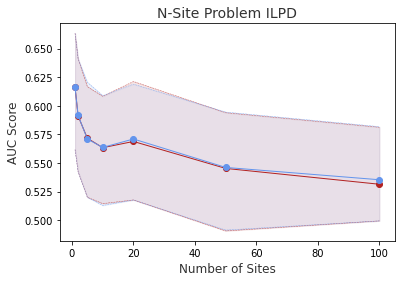

In [82]:
# Plot mean estimate as a line
plt.plot('n_', 'AUC Score_mean', data = plot_1_2, linewidth=1, alpha=1, color="firebrick", marker='o')
plt.plot('n_', 'AUC Score_25', data = plot_1_2, linewidth=0.5, alpha=0.7, color="firebrick", linestyle='--')
plt.plot('n_', 'AUC Score_75', data = plot_1_2, linewidth=0.5, alpha=0.7, color="firebrick", linestyle='--')

# Fill between the upper and lower bands
plt.fill_between(x = 'n_', 
                 y1 = 'AUC Score_25', y2 = 'AUC Score_75', 
                 data = plot_1_2, alpha=0.1, color="firebrick")

plt.plot('n_', 'AUC Score_mean', data = plot_1_3, linewidth=1, alpha=1, color="cornflowerblue", marker='o')
plt.plot('n_', 'AUC Score_25', data = plot_1_3, linewidth=0.5, alpha=0.7, color="cornflowerblue", linestyle='--')
plt.plot('n_', 'AUC Score_75', data = plot_1_3, linewidth=0.5, alpha=0.7, color="cornflowerblue", linestyle='--')

# Fill between the upper and lower bands
plt.fill_between(x = 'n_', 
                 y1 = 'AUC Score_25', y2 = 'AUC Score_75', 
                 data = plot_1_3, alpha=0.1, color="cornflowerblue")

plt.title("N-Site Problem ILPD", alpha=0.8, fontsize=14)
plt.xlabel("Number of Sites", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)

plt.show()


### Vis 2: Inter-Site Sample Size Imbalance

### Vis 3: Communication Efficiency

In [ ]:
path_comm_effi = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_comm_effi_ILPD_runtime_2064.csv"
df = pd.read_csv(path_comm_effi, index_col=False)

In [ ]:
# df.groupby(['r', 'v', 'n', 'e']).agg(["mean", "median", "var"]).reset_index()
df.groupby(['r', 'n', 'e']).agg(["mean", "var"])

s                 v             F_1 Score           MCC Score  \
         mean         var  mean         var      mean       var      mean   
r n  e                                                                      
1 1  1   50.5  841.666667   1.0    0.000000  0.828283  0.000000  0.000000   
     2   50.5  841.666667   1.0    0.000000  0.821207  0.000848  0.013045   
     5   50.5  841.666667   1.0    0.000000  0.780303  0.002599  0.116149   
     10  50.5  841.666667   1.0    0.000000  0.790006  0.001487  0.174194   
  2  1   50.5  837.437186   1.5    0.251256  0.824716  0.000441  0.004438   
...       ...         ...   ...         ...       ...       ...       ...   
5 5  10  50.5  833.583433  13.0   52.020808  0.767646  0.002278  0.147399   
  10 1   50.5  833.416683  25.5  208.291658  0.746099  0.008017  0.141838   
     2   50.5  833.416683  25.5  208.291658  0.766385  0.005130  0.125277   
     5   50.5  833.416683  25.5  208.291658  0.750133  0.003638  0.127768   
     10  50.5  833.416683  25.5  208.291658  0.748113  0.002575  0.123348   

                  AUC Score           ACC Score            
              var      mean       var      mean       var  
r n  e                                                     
1 1  1   0.000000  0.500000  0.000000  0.500000  0.000000  
     2   0.002859  0.507037  0.000833  0.507037  0.000833  
     5   0.019182  0.556765  0.004590  0.556765  0.004590  
     10  0.016662  0.575825  0.003698  0.575825  0.003698  
  2  1   0.000726  0.502353  0.000203  0.502353  0.000203  
...           ...       ...       ...       ...       ...  
5 5  10  0.021472  0.569624  0.004815  0.569624  0.004815  
  10 1   0.021840  0.572475  0.005638  0.572475  0.005638  
     2   0.019261  0.559241  0.004041  0.559241  0.004041  
     5   0.018669  0.561421  0.004011  0.561421  0.004011  
     10  0.018067  0.559894  0.004361  0.559894  0.004361  

[80 rows x 12 columns]

In [ ]:
"""         plt.ioff()
        plt.figure()

        plt.plot(local_metric.number_sites,
                 local_metric["25%"], linewidth=1, alpha=0.7, color="firebrick")
        plt.plot(local_metric.number_sites,
                 local_metric["75%"], linewidth=1, alpha=0.7, color="firebrick")
        plt.plot(local_metric.number_sites,
                 local_metric["mean"], linewidth=1, alpha=1, color="firebrick")
        plt.fill_between(local_metric.number_sites, local_metric["25%"],
                         local_metric["75%"], alpha=0.3, color="firebrick")

        plt.plot(global_metric.number_sites,
                 global_metric["25%"], linewidth=1, alpha=0.7, color="cornflowerblue")
        plt.plot(global_metric.number_sites,
                 global_metric["75%"], linewidth=1, alpha=0.7, color="cornflowerblue")
        plt.plot(global_metric.number_sites,
                 global_metric["mean"], linewidth=1, alpha=1, color="cornflowerblue")
        plt.fill_between(global_metric.number_sites, global_metric["25%"],
                         global_metric["75%"], alpha=0.3, color="cornflowerblue")

        sct1 = plt.scatter(global_metric.number_sites,
                           global_metric["mean"], color="cornflowerblue", marker="o", s=20)
        sct2 = plt.scatter(local_metric.number_sites,
                           local_metric["mean"], color="firebrick", marker="o", s=20)

        title = dataset_name + " - " + method + " method, " + \
            str(int(fraction*100)) + " % of features dropped"
        plt.title(title, alpha=0.8, fontsize=14)
        plt.xlabel("Number of Sites", alpha=0.8, fontsize=12)
        plt.ylabel(metric_name, alpha=0.8, fontsize=12) """